[[  0.   0.   0. ...   0.   0. 150.]
 [  0.   0.   0. ...   0.   0. 150.]
 [  0.   0.   0. ...   0.   0. 150.]
 ...
 [  0.   0.   0. ...   0.   0. 150.]
 [  0.   0.   0. ...   0.   0. 150.]
 [150. 150. 150. ...   0.   0.   0.]]


<ipython-input-2-ef007c529dfd>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','2','4'])
<ipython-input-2-ef007c529dfd>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$'])


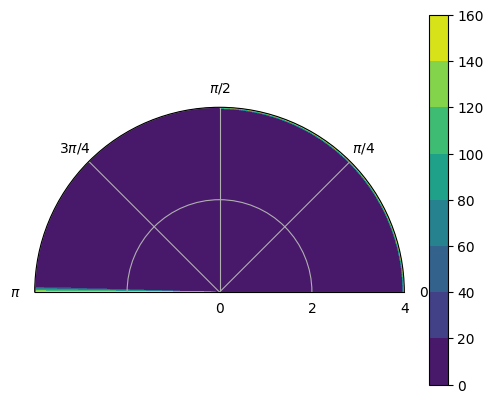

In [2]:

# Nombre: Samuel Cortes Salazar

"""
 1) Encuentre la solución a la ecuación de Laplace en coordenadas polares, con las siguientes condiciones de frontera:
      \Psi(r,0) = 0, \Psi(r,\pi) = 150, con 0<=r<=4; y \Psi(4,\theta) = 150 con 0<=\theta<= \pi/2, y \Psi(4,\theta) = 0 con \pi/2<\theta<=\pi
    Grafique la solución en coordenadas polares, utilizando valores pequeños de \delta r y \delta \theta.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

N = 100

r_len = np.linspace(0,4,N)
t_len = np.linspace(0,np.pi,N)


T, R = np.meshgrid(t_len,r_len)
Psi_sol = np.zeros_like(R)

# Condiciones de frontera


Psi_sol[:,0] = 0
Psi_sol[:,-1] = 150
Psi_sol[-1,:50] = 150
Psi_sol[-1,50:] = 0

print(Psi_sol)

# Plot:

ax = plt.subplot(polar=True)
ax.set_yticklabels(['0','2','4'])
ax.set_xticklabels(['0','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$'])
ax.set_xticks(np.arange(0,np.pi+0.1,np.pi/4))
ax.set_yticks(np.arange(0,5,2))
ctf = ax.contourf(t_len,r_len,Psi_sol)
plt.colorbar(ctf)
plt.axis([0,np.pi,0,4])
plt.show()

In [3]:
# Solución de la Ecuación de Laplace por método de relajación:

for iterations in range(1000):
  for i in range(1,N-1):
    for j in range(1,N-1):
      Psi_sol[i,j] = ((Psi_sol[i+1,j]+Psi_sol[i-1,j])+(Psi_sol[i+1,j])/(i**2)+(Psi_sol[i,j+1]+Psi_sol[i,j-1])/(i**2))/(1/i + 2 + 2/(i**2))

<ipython-input-4-36aa8abcf78d>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','2','4'])
<ipython-input-4-36aa8abcf78d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$'])


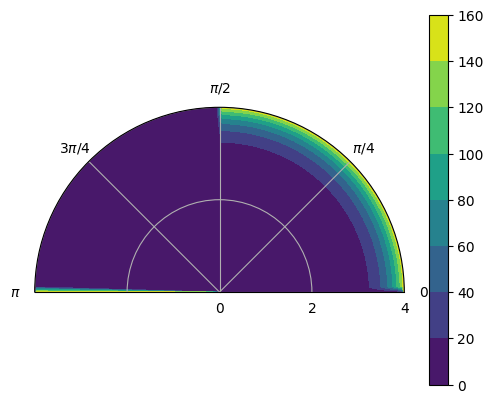

In [4]:
ax = plt.subplot(111,polar=True)
ax.set_yticklabels(['0','2','4'])
ax.set_xticklabels(['0','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$'])
ax.set_xticks(np.arange(0,np.pi+0.1,np.pi/4))
ax.set_yticks(np.arange(0,5,2))
ctf = ax.contourf(t_len,r_len,Psi_sol)
plt.colorbar(ctf)
plt.axis([0,np.pi,0,4])
plt.show()

<ipython-input-5-481364506fb1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','2','4'])
<ipython-input-5-481364506fb1>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$'])


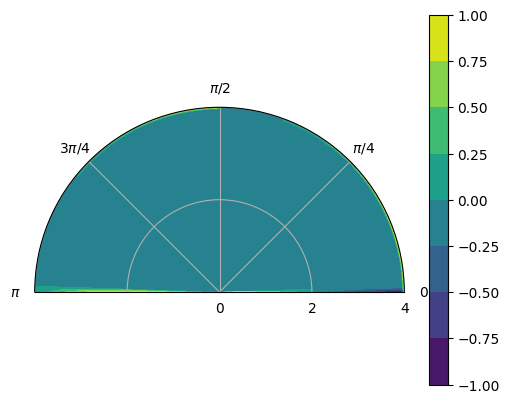

In [5]:
"""
 2) Cambie las condiciones de frontera por funciones que puedan depender de r y de \theta.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

N = 100

r_len = np.linspace(0,4,N)
t_len = np.linspace(0,np.pi,N)

T, R = np.meshgrid(t_len,r_len)
Psi_sol = np.zeros_like(R)

# Condiciones de frontera

Psi_sol[:,0] = np.cos(t_len)
Psi_sol[:,-1] = np.sin(t_len)
Psi_sol[-1,:50] = np.cos(r_len[:50])
Psi_sol[-1,50:-1] = np.sin(r_len[50:-1])

# Plot:

ax = plt.subplot(polar=True)
ax.set_yticklabels(['0','2','4'])
ax.set_xticklabels(['0','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$'])
ax.set_xticks(np.arange(0,np.pi+0.1,np.pi/4))
ax.set_yticks(np.arange(0,5,2))
ctf = ax.contourf(t_len,r_len,Psi_sol)
plt.colorbar(ctf)
plt.axis([0,np.pi,0,4])
plt.show()

<ipython-input-6-61255d9050b4>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','2','4'])
<ipython-input-6-61255d9050b4>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$'])


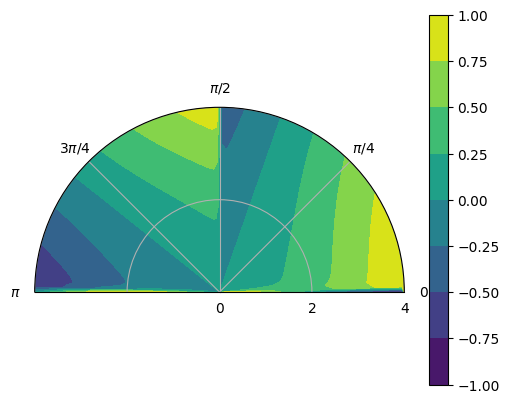

In [6]:
for iterations in range(1000):
  for i in range(1,N-1):
    for j in range(1,N-1):
      Psi_sol[i,j] = ((Psi_sol[i+1,j]+Psi_sol[i-1,j])+(Psi_sol[i+1,j])/i+(Psi_sol[i,j+1]+Psi_sol[i,j-1])/(i**2))/((1/i+2+2/(i**2)))

ax = plt.subplot(111,polar=True)
ax.set_yticklabels(['0','2','4'])
ax.set_xticklabels(['0','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$'])
ax.set_xticks(np.arange(0,np.pi+0.1,np.pi/4))
ax.set_yticks(np.arange(0,5,2))
ctf = ax.contourf(t_len,r_len,Psi_sol)
plt.colorbar(ctf)
plt.axis([0,np.pi,0,4])
plt.show()